<a href="https://colab.research.google.com/github/lamtrinh259/crypto_backend/blob/nis-kitchen/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importing the data && initial Preprocessing


In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/crypto_data/btcusd.csv')
dfo=df.copy()
df.head(5)


,time,open,close,high,low,volume
0,1364774820000,93.25,93.30,93.30,93.25,93.300000
1,1364774880000,100.00,100.00,100.00,100.00,93.300000
2,1364774940000,93.30,93.30,93.30,93.30,33.676862
3,1364775060000,93.35,93.47,93.47,93.35,20.000000
4,1364775120000,93.47,93.47,93.47,93.47,2.021627


In [2]:
df.time = pd.to_datetime(df.time, unit='ms')

In [3]:
df.tail(5)

,time,open,close,high,low,volume
3750533,2022-02-26 10:48:00,39000.000000,39012.0,39012.0,39000.000000,0.168502
3750534,2022-02-26 10:49:00,39008.000000,38976.0,39008.0,38971.410904,1.341707
3750535,2022-02-26 10:50:00,38971.755285,39029.0,39029.0,38967.949394,6.989503
3750536,2022-02-26 10:51:00,39027.000000,39092.0,39100.0,39027.000000,4.822631
3750537,2022-02-26 10:52:00,39092.000000,39069.0,39101.0,39067.572686,7.333250


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [5]:
df_mini = df.iloc[::10000]
df_mini.head(5)

,time,open,close,high,low,volume
0,2013-04-01 00:07:00,93.250,93.30,93.300,93.25,93.300000
10000,2013-04-19 23:54:00,118.819,117.90,118.819,117.90,80.001316
20000,2013-05-06 20:21:00,114.200,116.90,116.900,114.20,110.000000
30000,2013-05-31 10:21:00,127.880,127.88,127.880,127.88,0.119000
40000,2013-06-22 19:13:00,100.390,100.08,100.390,100.08,0.053576


In [6]:
fig = go.Figure(data=[go.Candlestick(x=df_mini['time'],
                open=df_mini['open'],
                high=df_mini['high'],
                low=df_mini['low'],
                close=df_mini['close'])])

In [7]:
fig.show()

In [8]:
df_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 3750000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    376 non-null    datetime64[ns]
 1   open    376 non-null    float64       
 2   close   376 non-null    float64       
 3   high    376 non-null    float64       
 4   low     376 non-null    float64       
 5   volume  376 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.8 KB


In [9]:
## preprocessing

from sklearn.preprocessing import Normalizer, MinMaxScaler



In [10]:
## using a MinMaxScaler
df_mini.reset_index(inplace=True)
df_mini = df_mini.drop(columns='index')
df_mini

,time,open,close,high,low,volume
0,2013-04-01 00:07:00,93.250000,93.30,93.300,93.250000,93.300000
1,2013-04-19 23:54:00,118.819000,117.90,118.819,117.900000,80.001316
2,2013-05-06 20:21:00,114.200000,116.90,116.900,114.200000,110.000000
3,2013-05-31 10:21:00,127.880000,127.88,127.880,127.880000,0.119000
4,2013-06-22 19:13:00,100.390000,100.08,100.390,100.080000,0.053576
...,...,...,...,...,...,...
371,2022-01-29 06:48:00,37690.427256,37722.00,37723.000,37689.932332,0.434815
372,2022-02-05 05:48:00,41618.000000,41657.00,41658.000,41618.000000,7.823411
373,2022-02-12 04:30:00,42416.000000,42429.00,42438.000,42416.000000,1.450080
374,2022-02-19 03:12:00,40252.308640,40259.00,40259.000,40252.308640,0.059979


In [11]:
df_mini_X = df_mini.drop(columns='time')

In [12]:
tf1 = MinMaxScaler().fit_transform(df_mini_X)

In [13]:
X_mini = pd.DataFrame(tf1).join(df_mini['time'],)
X_mini.rename(columns={0:'open',1:'close',2:'high',3:'low',4:'volume'},inplace =True)
X_mini

,open,close,high,low,volume,time
0,0.000015,0.000015,0.000015,0.000015,0.082916,2013-04-01 00:07:00
1,0.000416,0.000402,0.000416,0.000402,0.071098,2013-04-19 23:54:00
2,0.000344,0.000386,0.000386,0.000344,0.097758,2013-05-06 20:21:00
3,0.000559,0.000559,0.000559,0.000559,0.000106,2013-05-31 10:21:00
4,0.000127,0.000122,0.000127,0.000122,0.000047,2013-06-22 19:13:00
...,...,...,...,...,...,...
371,0.590806,0.591274,0.591290,0.590798,0.000386,2022-01-29 06:48:00
372,0.652523,0.653105,0.653120,0.652523,0.006953,2022-02-05 05:48:00
373,0.665062,0.665235,0.665377,0.665062,0.001289,2022-02-12 04:30:00
374,0.631063,0.631138,0.631138,0.631063,0.000053,2022-02-19 03:12:00


In [14]:
fig2 = go.Figure(data=[go.Candlestick(x=X_mini['time'],
                open=X_mini['open'],
                high=X_mini['high'],
                low=X_mini['low'],
                close=X_mini['close'])])
fig2.show()

In [15]:
from statsmodels.tsa.stattools import adfuller
# for column in 
print('p-value: ', adfuller(tf1[:,0])[1])

p-value:  0.9100220962487822


## Log Scaler and Log Difference

In [16]:
##using a Log scaler
import numpy as np

In [17]:
df_linearized = np.log(df_mini_X)
X_linearized = df_linearized.join(df_mini.time)
X_linearized

,open,close,high,low,volume,time
0,4.535284,4.535820,4.535820,4.535284,4.535820,2013-04-01 00:07:00
1,4.777601,4.769837,4.777601,4.769837,4.382043,2013-04-19 23:54:00
2,4.737951,4.761319,4.761319,4.737951,4.700480,2013-05-06 20:21:00
3,4.851092,4.851092,4.851092,4.851092,-2.128632,2013-05-31 10:21:00
4,4.609063,4.605970,4.609063,4.605970,-2.926654,2013-06-22 19:13:00
...,...,...,...,...,...,...
371,10.537161,10.537999,10.538025,10.537148,-0.832835,2022-01-29 06:48:00
372,10.636288,10.637225,10.637249,10.636288,2.057121,2022-02-05 05:48:00
373,10.655281,10.655587,10.655799,10.655281,0.371618,2022-02-12 04:30:00
374,10.602923,10.603089,10.603089,10.602923,-2.813761,2022-02-19 03:12:00


In [18]:
print('p-value: ', adfuller(df_linearized.iloc[:,0])[1])

p-value:  0.44342622075972793


In [19]:
fig3 = go.Figure(data=[go.Candlestick(x=X_linearized['time'],
                open=X_linearized['open'],
                high=X_linearized['high'],
                low=X_linearized['low'],
                close=X_linearized['close'])])
fig3.show()

In [20]:
## linear difference 
X_linearized.set_index('time',inplace=True)
X_linearized


,open,close,high,low,volume
time,,,,,
2013-04-01 00:07:00,4.535284,4.535820,4.535820,4.535284,4.535820
2013-04-19 23:54:00,4.777601,4.769837,4.777601,4.769837,4.382043
2013-05-06 20:21:00,4.737951,4.761319,4.761319,4.737951,4.700480
2013-05-31 10:21:00,4.851092,4.851092,4.851092,4.851092,-2.128632
2013-06-22 19:13:00,4.609063,4.605970,4.609063,4.605970,-2.926654
...,...,...,...,...,...
2022-01-29 06:48:00,10.537161,10.537999,10.538025,10.537148,-0.832835
2022-02-05 05:48:00,10.636288,10.637225,10.637249,10.636288,2.057121
2022-02-12 04:30:00,10.655281,10.655587,10.655799,10.655281,0.371618


In [21]:
X_linearized_diff = X_linearized.diff()
X_linearized_diff

,open,close,high,low,volume
time,,,,,
2013-04-01 00:07:00,NaN,NaN,NaN,NaN,NaN
2013-04-19 23:54:00,0.242317,0.234017,0.241781,0.234553,-0.153777
2013-05-06 20:21:00,-0.039650,-0.008518,-0.016282,-0.031886,0.318437
2013-05-31 10:21:00,0.113141,0.089773,0.089773,0.113141,-6.829112
2013-06-22 19:13:00,-0.242030,-0.245122,-0.242030,-0.245122,-0.798022
...,...,...,...,...,...
2022-01-29 06:48:00,0.055282,0.053162,0.051819,0.056037,-4.200888
2022-02-05 05:48:00,0.099127,0.099226,0.099223,0.099140,2.889956
2022-02-12 04:30:00,0.018993,0.018363,0.018551,0.018993,-1.685502


In [22]:
print('p-value: ', adfuller(X_linearized_diff.iloc[1:,1])[1])

p-value:  7.006552981809444e-29


In [23]:
fig4 = go.Figure(data=[go.Candlestick(x=X_linearized_diff.index,
                open=X_linearized_diff['open'],
                high=X_linearized_diff['high'],
                low=X_linearized_diff['low'],
                close=X_linearized_diff['close'])])
fig4.show()

In [24]:
##proposed pipeline

from sklearn.base import TransformerMixin, BaseEstimator

class LogTransformer(TransformerMixin,BaseEstimator):
  def __init__(self):
    pass
    
  def fit(self,X,y=None):
    return self

  def transform(self,X,y=None):
    X_linearized = np.log(X)
    return X_linearized
    if y:
      y_l = np.log(y)
      return y_l
    
  def inverse_transform(self, X, y=None):
    return np.exp(X)
    if y:
      y_ex = np.exp(y)
      return y_ex

In [25]:
class DifferenceTransformer(TransformerMixin,BaseEstimator):
  def __init__(self):
    pass

  def fit(self,X,y=None):
    return self

  def transform(self,X,y=None):
    X_linearized = np.log(X)
    if y:
      y_l = np.log(y)
    return X_linearized, y_l
    
  def inverse_transform(self, X, y=None):
    if y:
      y_ex = np.exp(y)
    return np.exp(X),y_ex

In [26]:
np.exp(1)

2.718281828459045

## ARIMA model


###  Checking for seasonality on Daily Set

In [93]:
df_temp = df.set_index('time')
df_daily = df_temp.resample('1D').mean()

In [28]:
df_daily.fillna(method='ffill',inplace=True)
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3254 entries, 2013-04-01 to 2022-02-26
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3254 non-null   float64
 1   close   3254 non-null   float64
 2   high    3254 non-null   float64
 3   low     3254 non-null   float64
 4   volume  3254 non-null   float64
dtypes: float64(5)
memory usage: 152.5 KB


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



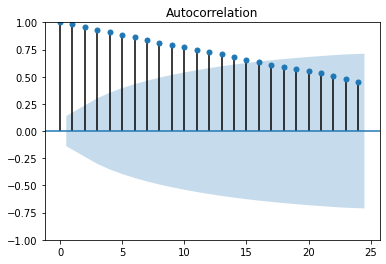

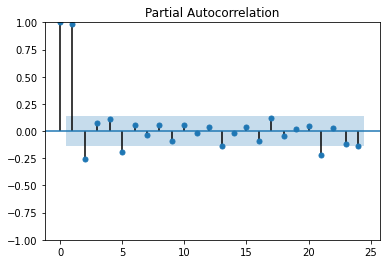

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_daily.iloc[-200:]['close']);
plot_pacf(df_daily.iloc[-200:]['close']);

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_add = seasonal_decompose(df_daily['close'], model="additive")
decomp_mult = seasonal_decompose(df_daily["close"], model="multiplicative")

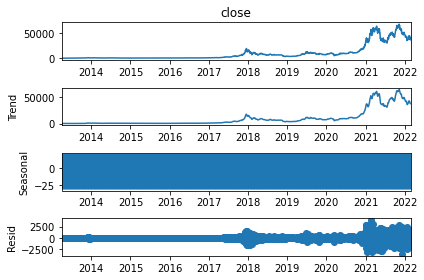

In [31]:
decomp_add.plot();

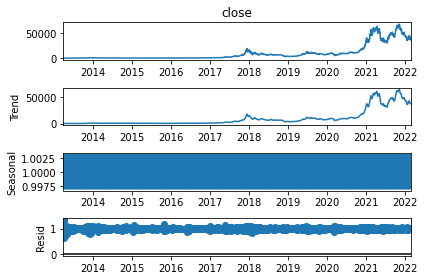

In [32]:
decomp_mult.plot();

### Checking for seasonality for ARIMA after taking the Log difff

In [33]:
df_d_log = np.log(df_daily)
df_d_logdiff = df_d_log.diff(1)[1:].copy()
df_d_logdiff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3253 entries, 2013-04-02 to 2022-02-26
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3253 non-null   float64
 1   close   3253 non-null   float64
 2   high    3253 non-null   float64
 3   low     3253 non-null   float64
 4   volume  3253 non-null   float64
dtypes: float64(5)
memory usage: 152.5 KB


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



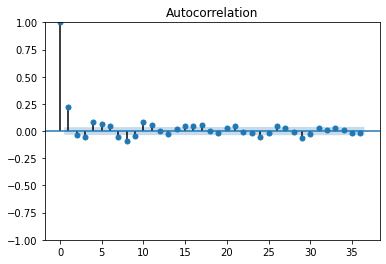

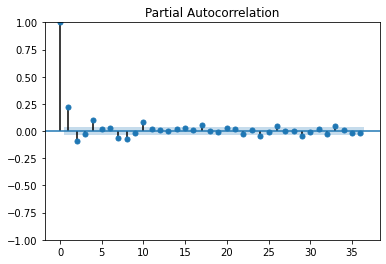

In [34]:
plot_acf(df_d_logdiff['close']);
plot_pacf(df_d_logdiff['close']);

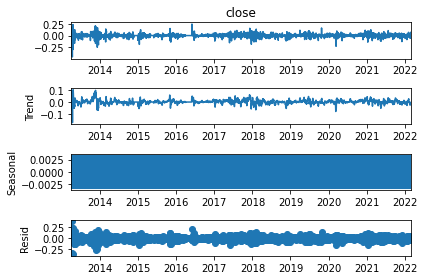

In [35]:
decomp_d_add = seasonal_decompose(df_d_logdiff['close'], model="additive")
decomp_d_add.plot();

### ARIMA (SARIMAX)

In [76]:
train_d = df_d_logdiff['close'].iloc[:-100]
test_d = df_d_logdiff['close'].iloc[-100:]

In [77]:
import pmdarima as pm

model = pm.auto_arima(train_d, 
                      start_p=0, max_p=5,
                      start_q=0, max_q=5, 
                      d=None,           # let model determine 'd'
                      test='adf',       # using adftest to find optimal 'd'
                      trace=True, error_action='ignore',  suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-11632.839, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-11793.654, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-11810.763, Time=0.83 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-11625.993, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-11808.771, Time=2.41 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-11808.778, Time=2.74 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-11807.738, Time=5.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-11806.668, Time=0.19 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 12.100 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3153
Model:               SARIMAX(0, 0, 1)   Log Likelihood                5908.381
Date:                Tue, 01 Mar 2022   AIC                         -11810.763
Time:              

In [84]:
forecast = model.predict(50)

In [85]:
forecast

array([-0.00198058,  0.00202404,  0.00202404,  0.00202404,  0.00202404,
        0.00202404,  0.00202404,  0.00202404,  0.00202404,  0.00202404,
        0.00202404,  0.00202404,  0.00202404,  0.00202404,  0.00202404,
        0.00202404,  0.00202404,  0.00202404,  0.00202404,  0.00202404,
        0.00202404,  0.00202404,  0.00202404,  0.00202404,  0.00202404,
        0.00202404,  0.00202404,  0.00202404,  0.00202404,  0.00202404,
        0.00202404,  0.00202404,  0.00202404,  0.00202404,  0.00202404,
        0.00202404,  0.00202404,  0.00202404,  0.00202404,  0.00202404,
        0.00202404,  0.00202404,  0.00202404,  0.00202404,  0.00202404,
        0.00202404,  0.00202404,  0.00202404,  0.00202404,  0.00202404])

In [86]:
forecast_rev = []
i = df_d_log['close'].iloc[-100]
for d in forecast:
  i += d
  forecast_rev.append(i)
pred = np.exp(forecast_rev)

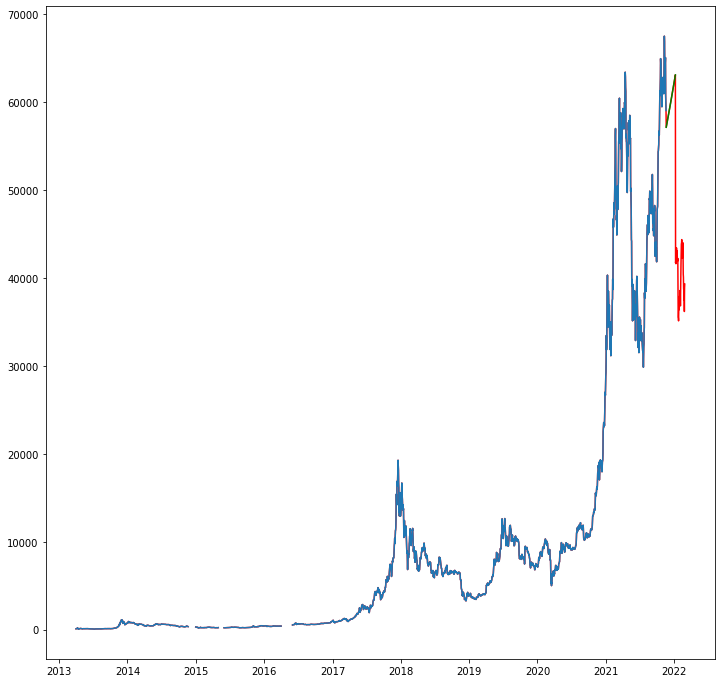

In [96]:
fig, ax = plt.subplots(figsize=(12,12))

temp = df_daily['close']
temp.iloc[-100:-50] = pred
plt.plot(df_daily['close'],color = 'red')
plt.plot(temp.iloc[-100:-50],color = 'green')
plt.plot(df_daily['close'].iloc[:-100])



In [98]:
from sklearn.metrics import mean_absolute_percentage_error
error = mean_absolute_percentage_error(forecast,test_d[:-50])

In [99]:
error

10.422884914106518

## FACEBOOK PROPHET

### minutely prediction

In [29]:
from fbprophet import Prophet
ph = Prophet(seasonality_mode='multiplicative', interval_width=0.95,daily_seasonality=True)

In [30]:
df_fb = df [['time','close']].copy()
df_fb = df_fb.rename(columns = {'time':'ds','close':'y'})
df_fb.head(4)

,ds,y
0,2013-04-01 00:07:00,93.30
1,2013-04-01 00:08:00,100.00
2,2013-04-01 00:09:00,93.30
3,2013-04-01 00:11:00,93.47


In [31]:
train = df_fb.iloc[-5000:-1000]
test = df_fb.iloc[-1000:]
ph.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


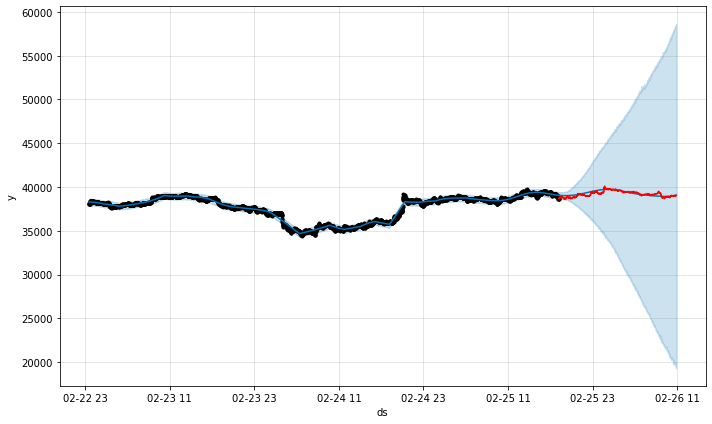

In [32]:
future=ph.make_future_dataframe(periods=1000,freq='min')
forecast1=ph.predict(future)
figure = ph.plot(forecast1)
figure.show()
plt.plot(test['ds'],test['y'],color = 'r')

In [33]:
from fbprophet.diagnostics import cross_validation


In [34]:
df_cv = cross_validation(ph, initial='3500 minutes', period='1 minute', horizon = '480 minute')

INFO:fbprophet:Making 20 forecasts with cutoffs between 2022-02-25 09:53:00 and 2022-02-25 10:12:00


  0%|          | 0/20 [00:00<?, ?it/s]

In [35]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 00:48:00,2.478864e+05,497.881914,481.858076,0.012466,0.012051,0.130208
1,0 days 00:49:00,2.509254e+05,500.924496,484.933895,0.012546,0.012139,0.129167
2,0 days 00:50:00,2.537112e+05,503.697514,487.600854,0.012615,0.012244,0.132292
3,0 days 00:51:00,2.562902e+05,506.251078,489.939127,0.012676,0.012333,0.134375
4,0 days 00:52:00,2.588103e+05,508.734053,492.136895,0.012733,0.012386,0.139583
...,...,...,...,...,...,...,...
428,0 days 07:56:00,5.320367e+06,2306.592132,2048.965669,0.052348,0.055948,1.000000
429,0 days 07:57:00,5.318818e+06,2306.256380,2047.406854,0.052315,0.056023,1.000000
430,0 days 07:58:00,5.318328e+06,2306.149983,2045.766455,0.052279,0.056107,1.000000
431,0 days 07:59:00,5.319124e+06,2306.322560,2044.044461,0.052242,0.056186,1.000000


### 30-day prediction 

In [54]:
df_daily_r = df_daily.reset_index()
df_daily_FB = df_daily_r[['time','close']].copy()
df_daily_FB.rename(columns = {'time':'ds','close':'y'},inplace=True)
df_daily_FB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3254 non-null   datetime64[ns]
 1   y       3254 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.0 KB


In [55]:
ph_day = Prophet(seasonality_mode='multiplicative', interval_width=0.95,daily_seasonality=True)

In [56]:
daily_train = df_daily_FB.iloc[:-31]
daily_test = df_daily_FB.iloc[-31:]

In [57]:
ph_day.fit(daily_train)

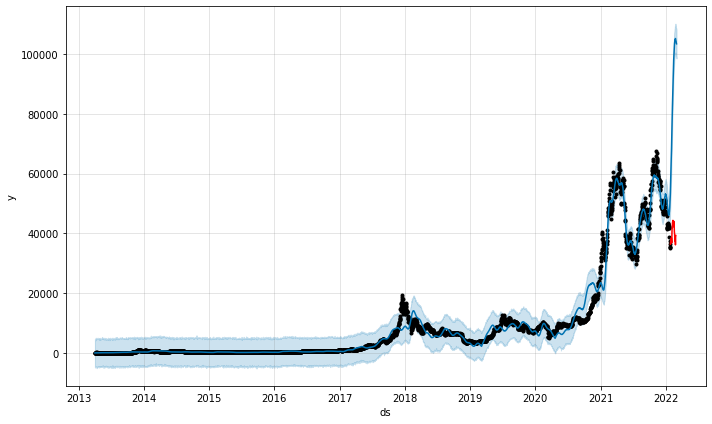

In [58]:
future=ph_day.make_future_dataframe(periods=35,freq='d')
forecast1=ph_day.predict(future)
figure = ph_day.plot(forecast1)
figure.show()
plt.plot(daily_test['ds'],daily_test['y'],color = 'r')

In [60]:
df_cv = cross_validation(ph_day, initial='3100 days', period='1 day', horizon = '30 days')
df_p = performance_metrics(df_cv)
df_p

INFO:fbprophet:Making 31 forecasts with cutoffs between 2021-09-28 00:00:00 and 2021-12-27 00:00:00


  0%|          | 0/31 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,1.315542e+08,11469.705872,9887.402120,0.173652,0.191304,0.204301
1,4 days,1.552623e+08,12460.430802,10730.499630,0.188234,0.210991,0.182796
2,5 days,1.813795e+08,13467.721990,11588.465405,0.203063,0.232024,0.172043
3,6 days,2.086870e+08,14446.003135,12424.765298,0.217476,0.250411,0.172043
4,7 days,2.372752e+08,15403.740335,13269.575357,0.232279,0.262440,0.161290
5,8 days,2.707264e+08,16453.764074,14200.468638,0.248629,0.291528,0.161290
6,9 days,3.060056e+08,17493.014961,15128.833001,0.265044,0.308057,0.150538
7,10 days,3.425545e+08,18508.228750,16046.578793,0.282085,0.332640,0.139785
8,11 days,3.756468e+08,19381.609723,16832.488436,0.297373,0.351859,0.139785
9,12 days,4.078614e+08,20195.578753,17570.096221,0.312087,0.368799,0.139785


In [14]:
from crypto_backend.utils import FB_grapher

ModuleNotFoundError: No module named 'crypto_backend'

In [6]:
!pip install -e ../

Obtaining file:///home/nibuntu/code/lamtrinh259/crypto_backend
  Preparing metadata (setup.py) ... done


  Attempting uninstall: crypto-backend
    Found existing installation: crypto-backend 1.0
    Uninstalling crypto-backend-1.0:
      Successfully uninstalled crypto-backend-1.0
  Running setup.py develop for crypto-backend


In [12]:
!pip list

Package                      Version             Editable project location
---------------------------- ------------------- ---------------------------------------------
absl-py                      1.0.0
aiobotocore                  2.1.1
aiohttp                      3.8.1
aioitertools                 0.10.0
aiosignal                    1.2.0
alembic                      1.7.6
anyio                        3.5.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asgiref                      3.5.0
astroid                      2.9.3
asttokens                    2.0.5
astunparse                   1.6.3
async-timeout                4.0.2
attrs                        21.4.0
Babel                        2.9.1
backcall                     0.2.0
black                        22.1.0
bleach                       4.1.0
botocore                     1.23.24
cachetools                   5.0.0
certifi                      2021.10.8
cffi                         1.15.0
charset-norma

## LSTM testing


In [26]:
from crypto_backend.data import get_data, organize_data, daily_data, get_LSTM_data_with_objective
from crypto_backend.transformers import LogTransformer
from crypto_backend.preprocessing import preprocessing_LSTM_data_and_get_generators
from crypto_backend.utils import init_and_compile_model, fit_LSTM_model, \
     LSTM_predict_with_generator, plot_LSTM_final_results
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from prophet import Prophet
import pmdarima as pm
import joblib
import pandas as pd
import tensorflow as tf
import numpy as np


class Trainer(object):
    def __init__(self, currency):
        '''
            X is a pandas dataframe, with the time column as the index
            y is the target for the forecast
        '''
        self.pipeFB = None
        self.pipeSARIMAX = None
        self.currency = currency
        self.X = None
        self.y = None
        # Default forecast objective is 'close'
        self.forecast_objective = 'close'

    #preprocessing pipeline
    def preproc_pipe_fb(self):
        self.pipeFB = Pipeline([
            ('LogTrans', LogTransformer()),
        ])

    def preproc_pipe_SA(self):
        self.pipeSARIMAX = Pipeline([
            ('LogTrans', LogTransformer())
        ])

    def load_data(self, daily_on = True):
        self.X = get_data(self.currency)
        self.X = organize_data(self.X)
        if daily_on:
            self.X = daily_data(self.X)
        self.lastday = self.X.index[-1]


    #generates a prophet model based on the coin
    def build_prophet(self):
        # Loading Data
        self.load_data()
        # initializing a prophet
        fbph = Prophet(seasonality_mode = 'multiplicative',
                        interval_width=0.95,
                        changepoint_prior_scale = 0.02,
                        yearly_seasonality = True,
                        weekly_seasonality = True,
                        daily_seasonality = True)
        # preprocess the data and changing it to the prophet format
        fbph.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        # prophet model performs better when it only sees the last year and half of data.
        data = self.X.iloc[-500:].copy()
        fb_data = data[['close']].reset_index()
        fb_data.rename(columns={'time':'ds','close':'y'},inplace = True)
        # prophet fitting and predicting
        fbph.fit(fb_data)
        #saving the model
        joblib.dump(fbph, f'models/{self.currency}_fb_prophet_model.joblib')



    #load saved Facebook Prophet Model and makes a 14-day prediction.
    def prophecy_predict(self,days=14):
        # fbph = joblib.load('prophet.joblib')
        #load the saved the model
        fbph = joblib.load(f'models/{self.currency}_fb_prophet_model.joblib')
        # making the prediction
        future= fbph.make_future_dataframe(periods=days,freq='d')
        forecast=fbph.predict(future)
        prediction = forecast.iloc[-14:]
        return {'data':self.X,'predict':prediction}

    def build_sarimax(self):
        #loading the Data
        self.load_data()
        #create pipeline
        self.preproc_pipe_SA()
        print('complete loading data and building pipeline')
        data = self.X.copy()
        data_t = self.pipeSARIMAX.fit_transform(data)
        model = pm.auto_arima(data_t['close'],
                            start_p=0, max_p=5,
                            start_q=0, max_q=5,
                            d=None,           # let model determine 'd'
                            test='adf',       # using adftest to find optimal 'd'
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True)
        joblib.dump(model, f'models/{self.currency}_sarimax_model.joblib')
        joblib.dump(self.pipeSARIMAX, f'models/{self.currency}_sarimax_model_pipe.joblib')

    #loads the sarimax model of the currency the make the 14 day prediction.
    def sarimax_prediction(self,days=14,return_conf_int=True):
        #loads the pre_made_sarimax model
        model = joblib.load(f'models/{self.currency}_sarimax_model.joblib')
        #loads the pipeline for the model
        self.pipeSARIMAX = joblib.load(f'models/{self.currency}_sarimax_model_pipe.joblib')
        #makes the n-day prediction
        forecast, conf_int = model.predict(days, return_conf_int = return_conf_int, alpha=0.05)
        #generate a n-day time range for the index of the results
        time_range = pd.date_range(start=self.lastday,periods =days+1)[1:]

        #insert the forecast data into a datafame that the transformer pipeline recognize
        d_temp = self.X.iloc[-1:].copy()
        d_temp = d_temp.append(pd.DataFrame({'close':forecast},index=time_range))
        d_temp.fillna(1)
        #inverse transform the data
        d_inv = self.pipeSARIMAX.inverse_transform(d_temp)
        d_inv =  d_inv.iloc[1:]
        conf_int = np.exp(conf_int)
        upper_end = pd.Series(conf_int[:,1],time_range)
        lower_end = pd.Series(conf_int[:,0],time_range)
        return {'data':self.X,'pred': d_inv['close'], 'upper':upper_end, 'lower':lower_end}

    def build_LSTM(self, objective='close'):
        """Build and save the LSTM model with given forecast objective
        Return most of the params to be used in the forecast step"""
        self.forecast_objective = objective
        self.X, self.y = get_LSTM_data_with_objective(self.currency, self.forecast_objective)
        train_gen, val_gen, test_gen, index_70pct, index_85pct, scaler_X, scaler_y = preprocessing_LSTM_data_and_get_generators(self.X, self.y)
        model = init_and_compile_model(self.X)
        model = fit_LSTM_model(model, train_gen, val_gen)
        model.save(f'models/{self.currency}_LSTM_{self.forecast_objective}_model')
        return scaler_X, scaler_y, index_70pct, index_85pct, test_gen

    def LSTM_predict(self, objective='close'):
        """Get the prediction and plot final results with LSTM"""
        self.forecast_objective = objective
        scaler_X, scaler_y, index_70pct, index_85pct, test_gen = self.build_LSTM()
        model = tf.keras.models.load_model(f'models/{self.currency}_LSTM_{self.forecast_objective}_model')
        df_plot = LSTM_predict_with_generator(model, self.X, self.y, scaler_X, scaler_y, index_70pct, index_85pct, test_gen)
#         plot_LSTM_final_results(df_plot, self.currency)
        return df_plot

    def LSTM_multi_predict(self):
        # make 3 predictions for LSTM for the CI
        pred_close = self.LSTM_predict()['pred_future_price'].iloc[-14:]
        pred_high = self.LSTM_predict('high')['pred_future_price'].iloc[-14:]
        pred_low = self.LSTM_predict('low')['pred_future_price'].iloc[-14:]
        results = pd.concat([pred_close,pred_high,pred_low],axis=1)
        return {'data':self.X, 'pred':results}

2022-03-08 14:43:30.964319: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-08 14:43:30.964426: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Shape of data after scaled is (698, 13) (698, 1)
The ending index for training set is 488
The beginning index for test set (also the ending index for val set) is 593
Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 0.0433 - mse: 0.0433

INFO:tensorflow:Assets written to: /home/nibuntu/code/lamtrinh259/crypto_backend/notebooks/checkpoints/assets


INFO:tensorflow:Assets written to: /home/nibuntu/code/lamtrinh259/crypto_backend/notebooks/checkpoints/assets


15/15 [==============================] - 11s 527ms/step - loss: 0.0433 - mse: 0.0433 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 2/50
15/15 [==============================] - 1s 72ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0563 - val_mse: 0.0563
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 0.0087 - mse: 0.0087

INFO:tensorflow:Assets written to: /home/nibuntu/code/lamtrinh259/crypto_backend/notebooks/checkpoints/assets


INFO:tensorflow:Assets written to: /home/nibuntu/code/lamtrinh259/crypto_backend/notebooks/checkpoints/assets


15/15 [==============================] - 7s 476ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 4/50
15/15 [==============================] - 1s 68ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.1105 - val_mse: 0.1105
Epoch 5/50
15/15 [==============================] - 1s 68ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0793 - val_mse: 0.0793
Epoch 6/50
15/15 [==============================] - 1s 61ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0452 - val_mse: 0.0452
Epoch 7/50
15/15 [==============================] - 1s 60ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0575 - val_mse: 0.0575
Epoch 8/50
15/15 [==============================] - 1s 61ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0586 - val_mse: 0.0586
Epoch 9/50
15/15 [==============================] - 1s 60ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0533 - val_mse: 0.0533
Epoch 10/50
15/15 [==============================] - 1s 60ms/step - loss: 0.0070 - mse: 0.007

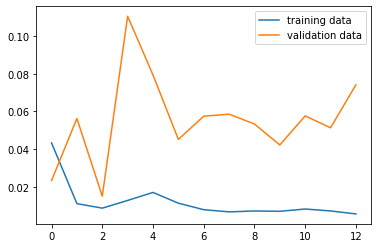

INFO:tensorflow:Assets written to: models/ETH_LSTM_close_model/assets


INFO:tensorflow:Assets written to: models/ETH_LSTM_close_model/assets


Shape of data after scaled is (698, 13) (698, 1)
The ending index for training set is 488
The beginning index for test set (also the ending index for val set) is 593
Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 0.0371 - mse: 0.0371

INFO:tensorflow:Assets written to: /home/nibuntu/code/lamtrinh259/crypto_backend/notebooks/checkpoints/assets


INFO:tensorflow:Assets written to: /home/nibuntu/code/lamtrinh259/crypto_backend/notebooks/checkpoints/assets


15/15 [==============================] - 11s 546ms/step - loss: 0.0371 - mse: 0.0371 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 2/50
15/15 [==============================] - 1s 79ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.1099 - val_mse: 0.1099
Epoch 3/50
15/15 [==============================] - 1s 71ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 4/50
15/15 [==============================] - 1s 69ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 5/50
15/15 [==============================] - 1s 66ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 6/50
15/15 [==============================] - 1s 70ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 7/50
15/15 [==============================] - 1s 85ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0391 - val_mse: 0.0391
Epoch 8/50
15/15 [==============================] - 1s 71ms/step - loss: 0.0072 - mse: 0.007

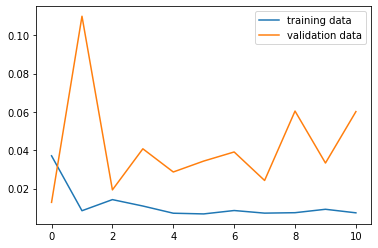

INFO:tensorflow:Assets written to: models/ETH_LSTM_close_model/assets


INFO:tensorflow:Assets written to: models/ETH_LSTM_close_model/assets


Shape of data after scaled is (698, 13) (698, 1)
The ending index for training set is 488
The beginning index for test set (also the ending index for val set) is 593
Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 0.0438 - mse: 0.0438

INFO:tensorflow:Assets written to: /home/nibuntu/code/lamtrinh259/crypto_backend/notebooks/checkpoints/assets


INFO:tensorflow:Assets written to: /home/nibuntu/code/lamtrinh259/crypto_backend/notebooks/checkpoints/assets


15/15 [==============================] - 11s 549ms/step - loss: 0.0438 - mse: 0.0438 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2/50
15/15 [==============================] - 1s 75ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.1051 - val_mse: 0.1051
Epoch 3/50
15/15 [==============================] - 1s 74ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0443 - val_mse: 0.0443
Epoch 4/50
15/15 [==============================] - 1s 82ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 5/50
15/15 [==============================] - 1s 66ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 6/50
15/15 [==============================] - 1s 67ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0403 - val_mse: 0.0403
Epoch 7/50
15/15 [==============================] - 1s 68ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0467 - val_mse: 0.0467
Epoch 8/50
15/15 [==============================] - 1s 68ms/step - loss: 0.0071 - mse: 0.007

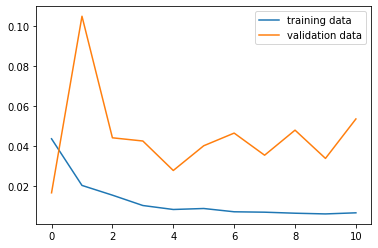

INFO:tensorflow:Assets written to: models/ETH_LSTM_close_model/assets


INFO:tensorflow:Assets written to: models/ETH_LSTM_close_model/assets


            pred_future_price  pred_future_price  pred_future_price
date                                                               
2022-02-27        2294.609375        2392.727783        2426.126953
2022-02-28        2276.360107        2371.541748        2411.554688
2022-03-01        2267.730225        2359.000244        2405.334717
2022-03-02        2263.653809        2348.396240        2408.870117
2022-03-03        2263.144043        2341.470459        2412.157471
2022-03-04        2267.688232        2339.284424        2417.499268
2022-03-05        2283.670166        2342.881104        2437.719238
2022-03-06        2296.505615        2349.029541        2458.783691
2022-03-07        2313.892822        2359.754883        2483.263672
2022-03-08        2333.773193        2373.740967        2509.193359
2022-03-09        2350.475342        2390.449219        2528.763916
2022-03-10        2372.990234        2412.065918        2554.302734
2022-03-11        2391.669922        2433.352783

In [7]:
trainer = Trainer('ETH')
    # scaler_X, scaler_y, index_70pct, index_85pct, test_gen = trainer.build_LSTM()
df_plot = trainer.LSTM_multi_predict()
print(df_plot['pred'])

In [16]:
df_plot['pred']

,pred_future_price,pred_future_price,pred_future_price
date,,,
2022-02-27,2294.609375,2392.727783,2426.126953
2022-02-28,2276.360107,2371.541748,2411.554688
2022-03-01,2267.730225,2359.000244,2405.334717
2022-03-02,2263.653809,2348.396240,2408.870117
2022-03-03,2263.144043,2341.470459,2412.157471
2022-03-04,2267.688232,2339.284424,2417.499268
2022-03-05,2283.670166,2342.881104,2437.719238
2022-03-06,2296.505615,2349.029541,2458.783691
2022-03-07,2313.892822,2359.754883,2483.263672


In [19]:
df_plot['pred'].sort_values(by=df_plot['pred'].index[0],axis=1,)

,pred_future_price,pred_future_price,pred_future_price
date,,,
2022-02-27,2294.609375,2392.727783,2426.126953
2022-02-28,2276.360107,2371.541748,2411.554688
2022-03-01,2267.730225,2359.000244,2405.334717
2022-03-02,2263.653809,2348.396240,2408.870117
2022-03-03,2263.144043,2341.470459,2412.157471
2022-03-04,2267.688232,2339.284424,2417.499268
2022-03-05,2283.670166,2342.881104,2437.719238
2022-03-06,2296.505615,2349.029541,2458.783691
2022-03-07,2313.892822,2359.754883,2483.263672


In [8]:
import sys
import urllib.parse
import requests

In [20]:
BASE_URI = "https://api-pub.bitfinex.com"
def get_data(time='1D',symbol='BTCUSD',section='hist'):
    
    '''Look for a given city and disambiguate between several candidates. Return one city or None'''
    search_url = urllib.parse.urljoin(BASE_URI,f'/v2/candles/trade:{time}:t{symbol}/{section}?limit=50')
    response = requests.get(search_url).json()
    return response if response else None

In [22]:
response = get_data()

In [39]:
df = pd.DataFrame(response[::-1]).set_axis(['time','open','close','high','low','volume'],axis='columns')
df.time = pd.to_datetime(df.time, unit='ms')

In [40]:
df

,time,open,close,high,low,volume
0,2022-01-18,42221.000000,42376.973152,42690.000000,41204.000000,4340.512217
1,2022-01-19,42373.000000,41676.000000,42596.000000,41158.000000,6452.474845
2,2022-01-20,41677.000000,40692.209812,43591.000000,40568.390197,5112.360709
3,2022-01-21,40690.348936,36467.000000,41132.000000,35471.000000,16224.367234
4,2022-01-22,36463.160761,35104.746284,36861.574249,33854.975025,17582.374936
5,2022-01-23,35108.000000,36308.000000,36556.000000,34654.000000,8715.956863
6,2022-01-24,36302.000000,36702.000000,37596.000000,32937.000000,23104.420659
7,2022-01-25,36706.000000,36986.000000,37584.000000,35751.000000,8863.281441
8,2022-01-26,36995.000000,36828.542176,38935.000000,36291.695939,10646.062758
9,2022-01-27,36847.647615,37194.000000,37275.000000,35504.000000,6940.900516


In [46]:
from datetime import datetime as dt

In [51]:
dt.now().date()

datetime.date(2022, 3, 8)

In [87]:
def get_data_from_api(time='1m',currency='BTCUSD',section='hist',frames=10000):
    BASE_URI = "https://api-pub.bitfinex.com"
    '''getting the data for the currency in the time difference'''
    search_url = urllib.parse.urljoin(BASE_URI,f'/v2/candles/trade:{time}:t{currency}/{section}?limit={frames}')
    responses = requests.get(search_url).json()
#     if responses and frames>=100:
#         df = pd.DataFrame(columns=['time','open','close','high','low','volume'])
#         for response in responses:
#             print(response)
#             temp = pd.DataFrame(response[::-1]).set_axis(['time','open','close','high','low','volume'],axis='columns')
#             df = pd.concat([df,temp])
#         df.to_csv(f'../local_data/{currency}_{time}_{str(dt.now().date())}.csv')
#         return df    
    if responses:
        df = pd.DataFrame(responses[::-1]).set_axis(['time','open','close','high','low','volume'],axis='columns')
        return df
    return None

In [88]:
get_data_from_api()

,time,open,close,high,low,volume
0,1646121540000,43493.000000,43504.000000,43520.000000,43493.000000,0.319507
1,1646121600000,43508.000000,43495.080010,43510.000000,43482.000000,10.037078
2,1646121660000,43495.000000,43495.080010,43512.000000,43490.000000,0.662052
3,1646121720000,43494.000000,43499.000000,43506.000000,43488.000000,0.536577
4,1646121780000,43510.725722,43515.000000,43515.000000,43506.952628,0.107896
...,...,...,...,...,...,...
9995,1646721240000,38058.000000,38061.495745,38080.553347,38026.000000,2.381644
9996,1646721300000,38052.987163,38087.000000,38089.000000,38052.987163,0.852841
9997,1646721360000,38086.000000,38082.159676,38110.000000,38075.000000,0.649577
9998,1646721420000,38082.159676,38112.000000,38114.000000,38082.159676,0.006914


In [89]:
import crypto_backend.table as tables
from crypto_backend.trainer import Trainer

In [92]:
trainer = Trainer('BTC')
trainer.load_data()
pred = trainer.prophecy_predict()
table = tables.make_fb_table(pred)
table

FileNotFoundError: [Errno 2] No such file or directory: 'models/BTC_fb_prophet_model.joblib'

In [93]:
import crypto_backend.utils as utils